### 2DO Parcial - Nava Siñani Kelvin Jherman
Crrera: Ing. de Sistemas
Apredizaje no supervisado

DataSet:Prediction of music genre
URL: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre/data

GitHub: https://github.com/Kel-340/InteligenciaArtificial

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# Cargar el nuevo conjunto de datos
df = pd.read_csv('/content/drive/MyDrive/music_genre.csv')

# Reemplazar NaN con 0 en todo el DataFrame
df.fillna(0, inplace=True)

diccionario = {"G": 0, "C": 1, "C#": 2, "D": 3, "A": 4, "G#": 5, "F": 6, "B": 7, "A#": 8, "F#": 9, "E": 10, "D#": 11}
df["key"] = df["key"].replace(diccionario)

diccionario1 = {"Major": 0, "Minor": 1}
df["mode"] = df["mode"].replace(diccionario1)

diccionario1 = {"?": 0}
df["tempo"] = df["tempo"].replace(diccionario1)

diccionario2 = {"Electronic": 0, "Anime": 1, "Jazz": 2, "Alternative": 3, "Country": 4, "Classical": 5, "Hip-Hop": 6, "Rock": 7, "Blues": 8, "Rap": 9}
df["music_genre"] = df["music_genre"].replace(diccionario2)


df = df.drop("instance_id", axis=1)
df = df.drop("artist_name", axis=1)
df = df.drop("track_name", axis=1)
df = df.drop("obtained_date", axis=1)

# Seleccionar las características (features) y la variable objetivo (target)
X_train = df.iloc[:50000, df.columns != "music_genre"]
y_train = df.iloc[:50000, df.columns.get_loc("music_genre")]

X_test = df.iloc[50000:80000, df.columns != "music_genre"]
y_test = df.iloc[50000:80000, df.columns.get_loc("music_genre")]

X = X_train


print(X.shape)
print(X.shape)

print(X)
print(X_test)

# Number of clusters for K-Means
k = 50

(50000, 13)
(50000, 13)
       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0      0.004680         0.652         -1.0   0.941   
1            31.0      0.012700         0.622     218293.0   0.890   
2            28.0      0.003060         0.620     215613.0   0.755   
3            34.0      0.025400         0.774     166875.0   0.700   
4            32.0      0.004650         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
49995        55.0      0.000577         0.937     278707.0   0.695   
49996        57.0      0.036300         0.829     230147.0   0.435   
49997        75.0      0.171000         0.587     254694.0   0.711   
49998        55.0      0.474000         0.514     246773.0   0.730   
49999        56.0      0.133000         0.849     237667.0   0.660   

       instrumentalness  key  liveness  loudness  mode  speechiness  \
0              0.792000    8     0.115    -5.201     1       0.0

In [6]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_n=X_scaled
# Verificar las dimensiones de los datos
print(X.shape)
print(X_scaled.shape)
print(X)

(50000, 13)
(50000, 13)
       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0      0.004680         0.652         -1.0   0.941   
1            31.0      0.012700         0.622     218293.0   0.890   
2            28.0      0.003060         0.620     215613.0   0.755   
3            34.0      0.025400         0.774     166875.0   0.700   
4            32.0      0.004650         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
49995        55.0      0.000577         0.937     278707.0   0.695   
49996        57.0      0.036300         0.829     230147.0   0.435   
49997        75.0      0.171000         0.587     254694.0   0.711   
49998        55.0      0.474000         0.514     246773.0   0.730   
49999        56.0      0.133000         0.849     237667.0   0.660   

       instrumentalness  key  liveness  loudness  mode  speechiness  \
0              0.792000    8     0.115    -5.201     1       0.0

In [28]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50, random_state=42)

In [29]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X)
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5653664554858778

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

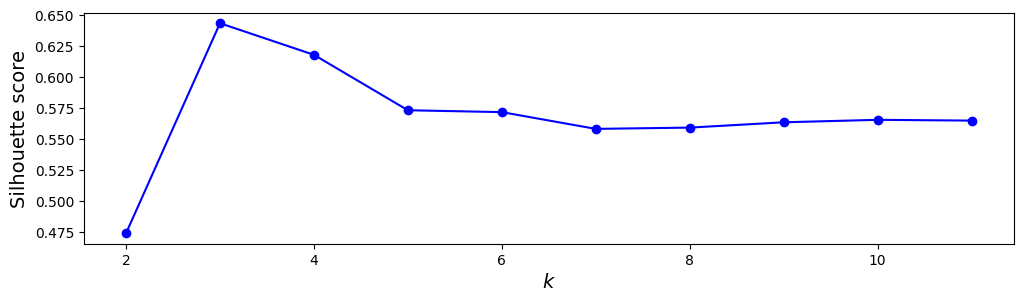

In [30]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 12)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(12, 3))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()


In [31]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

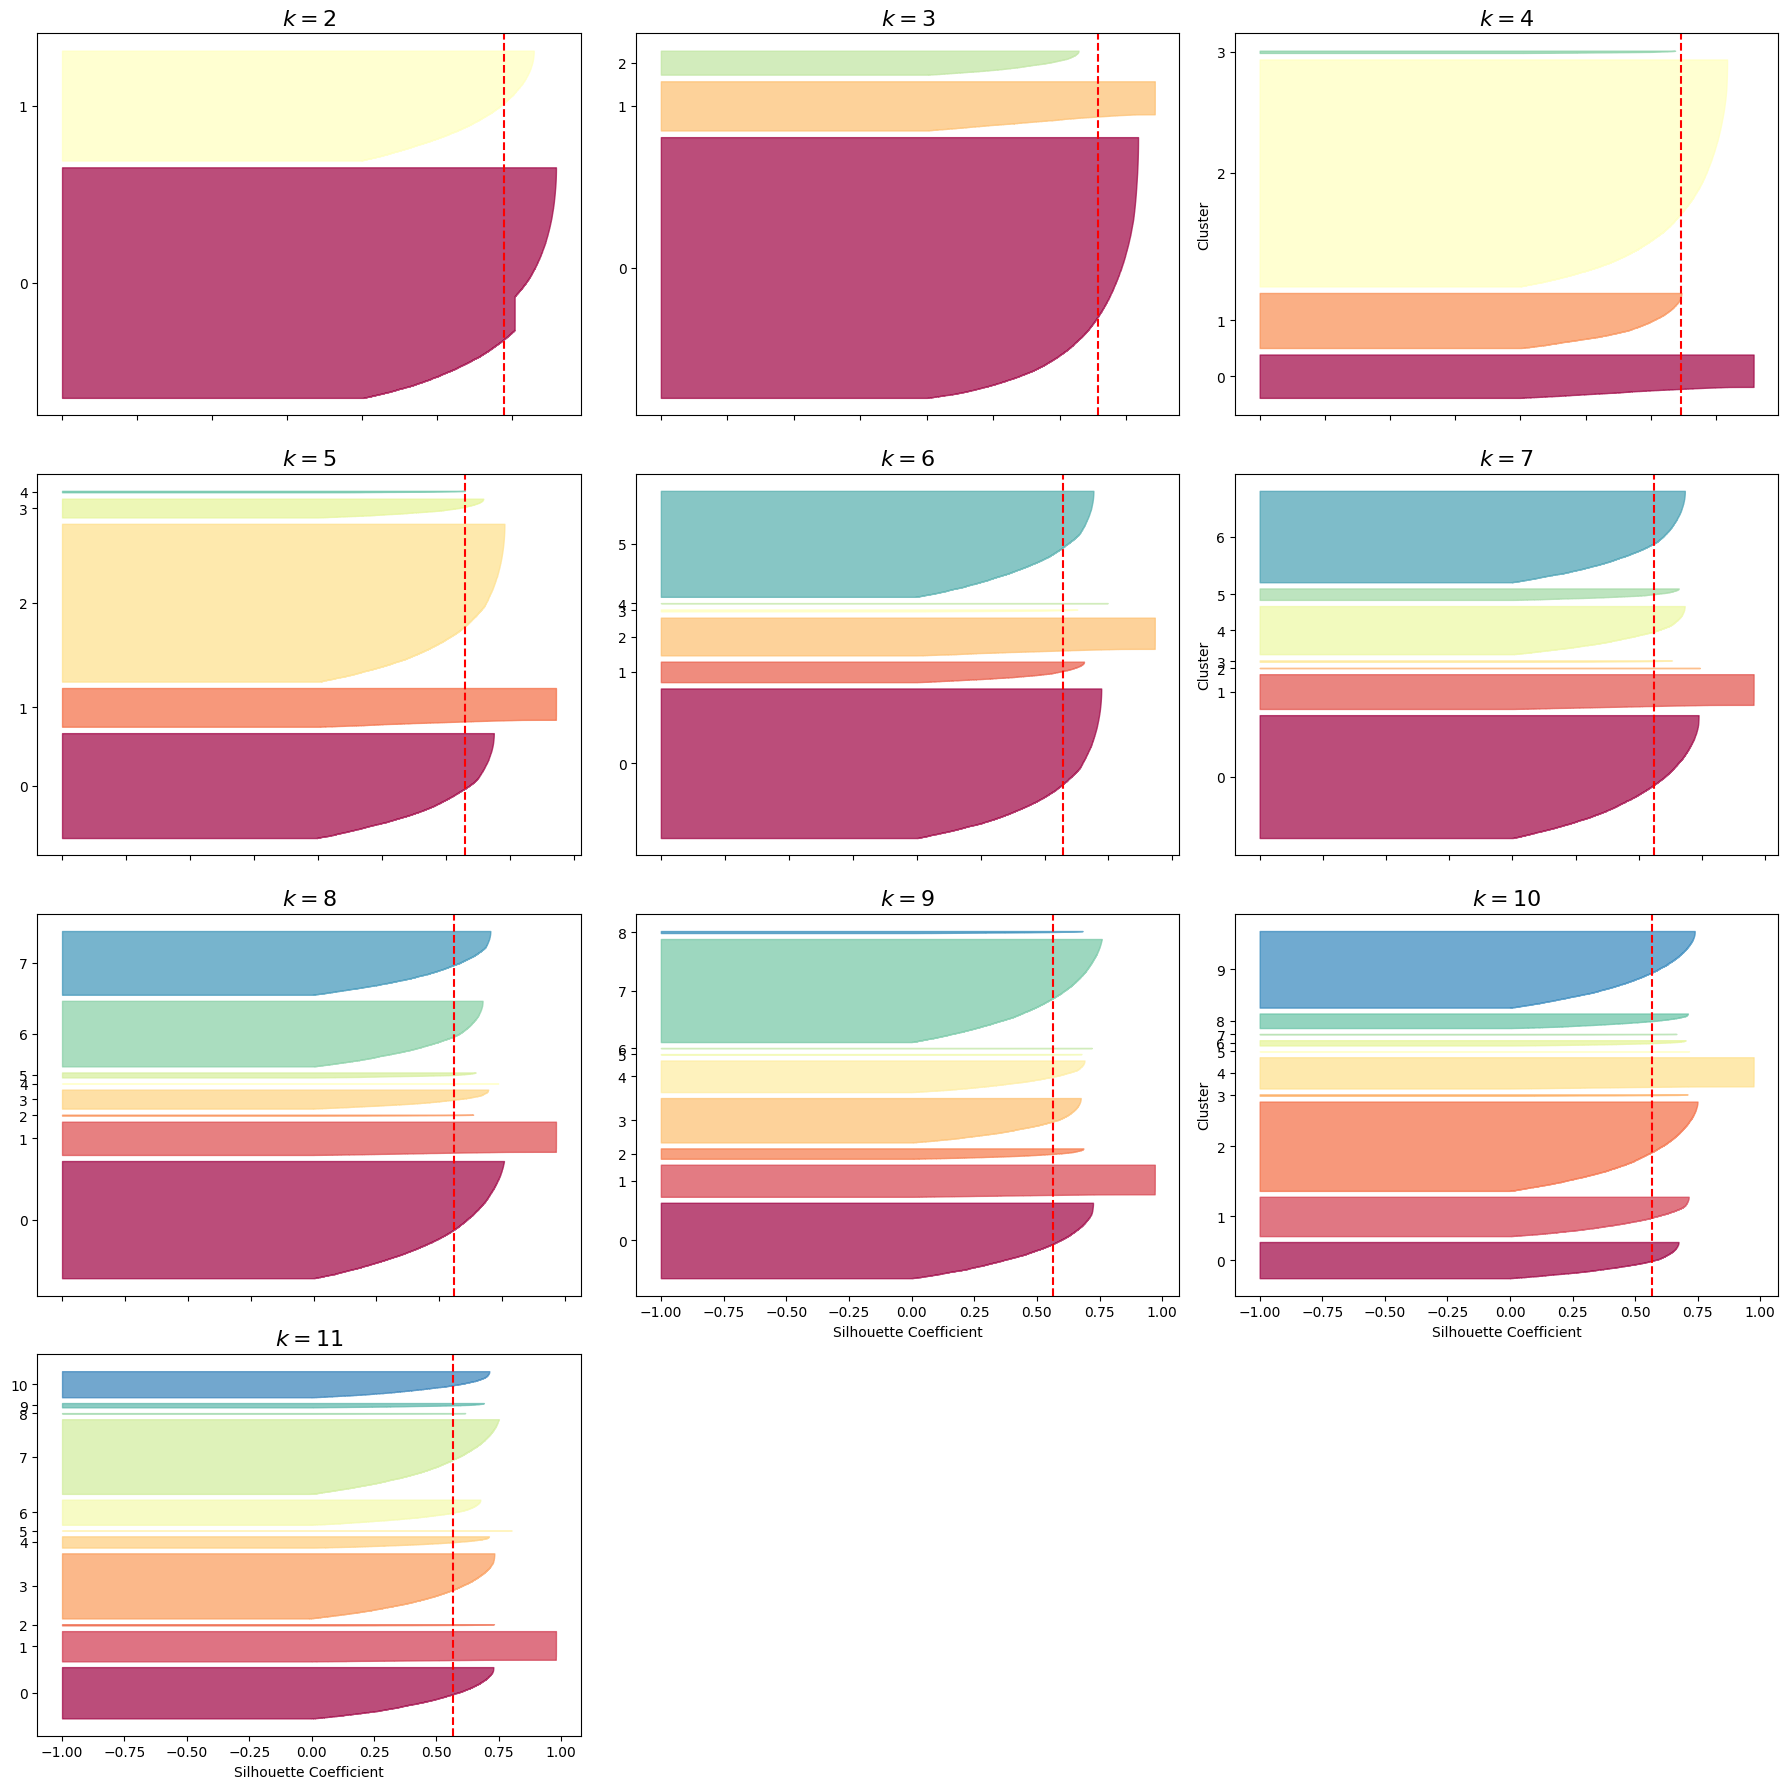

In [32]:
plt.figure(figsize=(18, 18))

# Ajustar el número de filas y columnas para que se ajusten todos los subgráficos
n_rows = 4
n_cols = 3

for k in range(2, 12):
    plt.subplot(n_rows, n_cols, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 50
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), -1, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k % n_cols == 1:
        plt.ylabel("Cluster")

    if k > 8:
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.cluster import KMeans

# Número de clusters para el aprendizaje activo
k = 50

# Inicializar el modelo de clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

In [8]:
# Calcular las distancias a los centroides y obtener ejemplos representativos
X_train_values = X_train_n # Convertir el DataFrame de entrenamiento normalizado a un array numpy
X_train_dist = kmeans.fit_transform(X_train_values)  # Calcular las distancias a los centroides
idxs = np.argmin(X_train_dist, axis=0)  # Obtener los índices de los ejemplos más cercanos a cada centroide
X_representative_examples = X_train_values[idxs]  # Obtener los ejemplos representativos

# Imprimir la forma de los ejemplos representativos
print("Forma de los ejemplos representativos:", X_representative_examples.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Forma de los ejemplos representativos: (50, 13)


In [9]:
from sklearn.linear_model import LogisticRegression

# Inicializar un modelo de regresión logística
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Obtener las etiquetas correspondientes a los ejemplos representativos
y_train_values = y_train.values
y_representative_examples = y_train_values[idxs]

# Entrenar el modelo de regresión logística con los ejemplos representativos y sus etiquetas
log_reg.fit(X_representative_examples, y_representative_examples)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [10]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para el conjunto de prueba utilizando el modelo entrenado
y_pred_test = log_reg.predict(X_train_n)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_train, y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy)


Precisión del modelo en el conjunto de prueba: 0.31642


In [11]:
# Obtener las probabilidades de predicción para los ejemplos en el conjunto de prueba (ya lo hicimos con y_pred_test)
probas = log_reg.predict_proba(X_train_n)

# Seleccionar ejemplos inciertos basados en las probabilidades de predicción
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels) #ordenar de menor a mayor probabilidad
X_lowest = X_train_n[sorted_ixs[:k]]
y_lowest = y_train.values[sorted_ixs[:k]]

# Actualizar las etiquetas de los ejemplos inciertos en el conjunto de prueba
y_train_active = y_train.copy()
y_train_active[sorted_ixs[:k]] = y_lowest

# Entrenar un nuevo modelo de regresión logística con las etiquetas actualizadas en el conjunto de prueba
log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg_active.fit(X_train_n, y_train_active)

# Evaluar la precisión del modelo de aprendizaje activo en el conjunto de prueba
accuracy_active = log_reg_active.score(X_train_n, y_train)
print(f"Precisión del modelo de aprendizaje activo (1ra repetición): {accuracy_active:.4f}")
# Mostrar los datos de y_train
print("Datos de y_train:", y_train.values)

Precisión del modelo de aprendizaje activo (1ra repetición): 0.5047
Datos de y_train: [0 0 0 ... 6 6 6]
